<h1 style="text-align: center;">
    O NAUFRÁGIO DO TITANIC – Uma Trágica História de Inovação e Perda
</h1>


<div style="text-align: center;">
    <img src="https://ichef.bbci.co.uk/ace/ws/800/cpsprodpb/17F4E/production/_124162189_gettyimages-1371405694.jpg.webp" alt="Titanic" width="1000" height="50"/>
</div>


**CONTEXTUALIZANDO**

> O RMS Titanic foi um **navio de passageiros** britânico que foi considerado, na época de sua construção, um dos **maiores e mais luxuosos transatlânticos do mundo.** Ele foi projetado para ser **inafundável**, com compartimentos estanques que, teoricamente, impediriam que o navio afundasse em caso de danos. A construção do Titanic foi feita pela Harland and Wolff, em Belfast, e sua inauguração foi recebida com grande entusiasmo.
>
> O Titanic partiu de Southampton, na Inglaterra, em sua viagem inaugural para Nova York, nos Estados Unidos, em 10 de abril de 1912. O navio tinha uma **capacidade para mais de 2.200 pessoas**, incluindo **passageiros de primeira, segunda e terceira classes, além da tripulação**.
>
> No entanto, na noite de 14 de abril de 1912, durante sua viagem pelo Atlântico Norte, o **Titanic colidiu com um iceberg**. A colisão causou **danos fatais** ao casco do navio, o que resultou em uma inundação rápida e descontrolada dos compartimentos abaixo do convés.
>
> O navio afundou nas primeiras horas de 15 de abril de 1912, em uma das maiores tragédias marítimas da história. **Aproximadamente 1.500 pessoas perderam suas vidas**, incluindo passageiros e membros da tripulação. A **falta de botes salva-vidas suficientes**, as **baixas temperaturas da água** e o **pânico generalizado** contribuíram para a alta mortalidade.
>
> O desastre gerou uma enorme comoção global e resultou em mudanças nas regulamentações de segurança para embarcações, como a exigência de mais botes salva-vidas e a criação de protocolos de segurança mais rigorosos.
>
> Hoje, o Titanic é **lembrado tanto como um símbolo da inovação da época quanto como um lembrete das falhas humanas e das limitações da tecnologia**. O evento inspirou livros, filmes e inúmeras pesquisas científicas, além de um legado duradouro sobre segurança marítima.


**OBJETIVO**


> Portanto, o **`objetivo`** deste projeto é prever se um passageiro sobreviveu ou não ao naufrágio do Titanic baseado nas características dos passageiros que embarcaram no Navio. **`Pergunta Central:`** Como podemos prever a sobrevivência dos passageiros no Titanic utilizando as variáveis disponíveis no dataset?

### 📊 **Entendimento dos Dados**  

Nesta etapa, exploramos o conjunto de dados do Titanic para compreender suas características e estrutura. Essa análise inicial foi fundamental para direcionar as decisões na preparação dos dados e no desenvolvimento do modelo.

| Variáveis    | Definição                                        | Chave                                      |
|-------------|------------------------------------------------|-------------------------------------------|
| Survival    | Sobreviventes                                   | 0 = No, 1 = Yes                          |
| PassengerId | Apenas o número da linha                      |                                           |
| Pclass      | A classe do Ticket                            | 1 = 1st, 2 = 2nd, 3 = 3rd                 |
| Name        | Nome do passageiro                            |                                           |
| Sex         | Gênero                                        |                                           |
| Age         | Idade em anos                                 |                                           |
| SibSp       | Número de irmãos / Cônjuge a bordo do Titanic |                                           |
| Parch       | Número de pais / crianças a bordo do Titanic |                                           |
| Ticket      | Número do Ticket                             |                                           |
| Fare        | Tarifa do Passageiro                         |                                           |
| Cabin       | Número da Cabine                             |                                           |
| Embarked    | Porto do Embarque                            | C = Cherbourg, Q = Queenstown, S = Southampton |

In [1]:
# Importando a biblioteca pandas e nomeando-a de pd
import pandas as pd
import numpy as np

# Lendo as bases de treinamento
treinamento = pd.read_csv('train.csv')

# Viazualizando a base de treinamento
treinamento.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2]:
# Lendo as bases de teste 
teste = pd.read_csv('test.csv')

# Vizualizando a base de teste
teste.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [3]:
# Vizualizando as info da tabela de trainamento
treinamento.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


>Na tabela de treinamento temos 177 dados faltantes na coluna idade. O que representa aproximadamente 20% de dados missing. Desnte modo não dá para apenas excluir essa linhas no tratamento.

>Temos dados Faltantes na coluna Cabine, mas não é uma coluna que pretendo usar. Portanto, não farei nenhum tratamento nesta coluna.

>Tem dois dados missing em 'Embarked', mas como também não é uma coluna que pretendo utilizar, não vou fazer nenhum tratamento em relação a ela. 

In [4]:
# Vizualizando as info da tabela de teste
teste.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


>Aqui temos a mesmas questões para a coluna 'Cabin' e 'Age'.

Sinto a necessidade de criar novas features, como: 
- Tamanho da família: SibSp + Parch + 1 (O próprio passageiro);
- Está sozinho: Indicador se o passageiro estava sozinho (Tamnho da família = 1)
- Grupo da idade = Categorizar a idade em grupos (Criança, Adulto, Idoso)

### 📊 **Preparação dos Dados**  

Na etapa de preparação dos dados, realizamos o tratamento das variáveis para garantir que o modelo receba informações de qualidade. As principais etapas incluíram:  

- **Lidar com valores ausentes:** Preenchimento ou remoção de dados faltantes conforme necessário.  
- **Codificação de variáveis categóricas:** Conversão de dados categóricos para um formato numérico adequado ao modelo.  
- **Criação de novas features:** Implementação de atributos derivados, como a categorização da idade.  

Essa fase foi essencial para garantir que o modelo operasse com dados limpos e bem estruturados.

In [5]:
# 1. Criar a variável 'Family Size'
teste['Family_Size'] = teste['SibSp'] + teste['Parch'] + 1  # +1 para incluir o próprio passageiro
treinamento['Family_Size'] = treinamento['SibSp'] + treinamento['Parch'] + 1  # +1 para incluir o próprio passageiro

In [6]:
# 2. Criar a variável 'está sozinho'
teste['Is_Alone'] = (teste['Family_Size'] == 1).astype(int)  # 1 se estiver sozinho, 0 caso contrário
treinamento['Is_Alone'] = (treinamento['Family_Size'] == 1).astype(int)  # 1 se estiver sozinho, 0 caso contrário

In [7]:
# 3. Criar a variável 'Is_Child' (Indicador se é criança)
def is_child(age):
    if age < 18:
        return 1  # Criança
    else:
        return 0  # Não Criança

# Aplicando a função para criar a coluna 'Is_Child'
teste['Is_Child'] = teste['Age'].apply(is_child)
treinamento['Is_Child'] = treinamento['Age'].apply(is_child)

In [8]:
# Aplicando uma mediana por classe nos dados faltantes na coluna idade 
treinamento['Age'] = treinamento.groupby('Pclass')['Age'].transform(lambda x: x.fillna(x.median()))
teste['Age'] = teste.groupby('Pclass')['Age'].transform(lambda x: x.fillna(x.median()))

In [9]:
# Importando funções
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import cross_val_score

# Definindo a features e target
y = treinamento['Survived']
features = ['Pclass', 'Fare', 'Sex','Family_Size']
X = pd.get_dummies(treinamento[features], drop_first = True)

# Separando treino (70%) e validação (30%) dentro do dataset de treinamento
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size = 0.3, random_state = 1)

### 🏗️ **Modelagem**  

Na etapa de modelagem, escolhi o algoritmo **Random Forest Classifier** para construir nosso modelo preditivo. Ajustamos os hiperparâmetros para otimizar o desempenho e garantir um bom equilíbrio entre **viés e variância**.  

Treinei o modelo utilizando os dados processados e realizei os testes para avaliar sua capacidade de generalização. Além disso, aplicamos técnicas como ajuste de hiperparâmetros e balanceamento de classes para melhorar a qualidade das previsões.

In [10]:
# Parâmetros ajustados
parâmetros = {'max_depth': 2, 'min_samples_leaf': 15, 'min_samples_split': 15, 'n_estimators': 100}

# Modelo
modelo = RandomForestClassifier(**parâmetros, random_state=1, class_weight={0: 1, 1: 2}) 

# Treinar o modelo
modelo.fit(X_train, y_train)

# Previsões no conjunto de treino
y_train_pred = modelo.predict(X_train)

>Como existem menos sobreviventes do que não sobreviventes, foi necessário fazer o uso do parâmetro 'class_wight' para balancear. 

### 📊 **Avaliação do Modelo**  

Na etapa de avaliação, analisamos o desempenho do modelo utilizando métricas como **acurácia, precisão, recall e F1-score**. Além disso, observamos a **matriz de confusão** para entender melhor os erros de classificação.  

Avaliamos tanto o conjunto de treino quanto o de validação para garantir que o modelo não esteja superajustado (overfitting) ou subajustado (underfitting). Caso necessário, realizamos ajustes nos hiperparâmetros para melhorar a generalização e obter um equilíbrio entre viés e variância.

In [11]:
#importando funções
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Previsões no conjunto de validação
y_val_pred = modelo.predict(X_valid)

# Avaliando o desempenho no conjunto de treino
accuracy_train = accuracy_score(y_train, y_train_pred)
precision_train = precision_score(y_train, y_train_pred)
recall_train = recall_score(y_train, y_train_pred)
f1_train = f1_score(y_train, y_train_pred)
confusion_train = confusion_matrix(y_train, y_train_pred)

# Avaliando o desempenho no conjunto de validação
accuracy_val = accuracy_score(y_valid, y_val_pred)
precision_val = precision_score(y_valid, y_val_pred)
recall_val = recall_score(y_valid, y_val_pred)
f1_val = f1_score(y_valid, y_val_pred)
confusion_val = confusion_matrix(y_valid, y_val_pred)

# Exibindo os resultados
print("Desempenho no conjunto de treino:")
print(f"Acurácia: {accuracy_train:.4f}")
print(f"Precisão: {precision_train:.4f}")
print(f"Recall: {recall_train:.4f}")
print(f"F1-Score: {f1_train:.4f}")
print(f"Matriz de Confusão:\n{confusion_train}\n")

print("Desempenho no conjunto de validação:")
print(f"Acurácia: {accuracy_val:.4f}")
print(f"Precisão: {precision_val:.4f}")
print(f"Recall: {recall_val:.4f}")
print(f"F1-Score: {f1_val:.4f}")
print(f"Matriz de Confusão:\n{confusion_val}")

Desempenho no conjunto de treino:
Acurácia: 0.7945
Precisão: 0.7089
Recall: 0.7401
F1-Score: 0.7241
Matriz de Confusão:
[[327  69]
 [ 59 168]]

Desempenho no conjunto de validação:
Acurácia: 0.7612
Precisão: 0.7297
Recall: 0.7043
F1-Score: 0.7168
Matriz de Confusão:
[[123  30]
 [ 34  81]]


>Após fazer diversas alterações no código, este foi o melhor depenho que eu conseguir para as bases de treinamento de validação. 

In [12]:
# Importando funções
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Definindo o grid de parâmetros
param_grid = {
    'n_estimators': [50, 100, 200],  # Número de árvores
    'max_depth': [5, 10, 20],  # Profundidade máxima das árvores
    'min_samples_split': [2, 5, 10],  # Número mínimo de amostras para dividir um nó
    'min_samples_leaf': [1, 2, 4],  # Número mínimo de amostras para ser uma folha
}

# Configuração da busca em grid
grid_search = GridSearchCV(
    estimator=RandomForestClassifier(random_state=1, class_weight='balanced'),  # Classificador RandomForest com peso ajustado
    param_grid=param_grid,
    cv=5,  # Aumentando para 5 folds para uma avaliação mais robusta
    n_jobs=-1,  # Usar todos os núcleos do processador
    verbose=2,  # Para acompanhar o progresso da busca
    scoring='f1',  # Focando no F1-Score, adequado para problemas desequilibrados
    refit=True  # Ajustar o modelo com os melhores parâmetros encontrados
)

# Treinando o modelo com a busca em grid
grid_search.fit(X_train, y_train)

# Exibindo os melhores parâmetros encontrados
print("Melhores parâmetros:", grid_search.best_params_)

# Exibindo o melhor modelo
best_model = grid_search.best_estimator_

# Avaliar o modelo no conjunto de validação
y_pred = best_model.predict(X_valid)
print("Desempenho no conjunto de validação:")

Fitting 5 folds for each of 81 candidates, totalling 405 fits
Melhores parâmetros: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 50}
Desempenho no conjunto de validação:


>Fiz o uso desse código para encontrar a melhor parametrização. No entanto, ao utilizar os parâmetros fornecidos, a base de treinamento se ajusta muito aos dados e os dados de validação acaba não depenhando tão bem quanto o de treinamento. O que demonstra claramente um overfiting.

       Feature  Importance
3     Sex_male    0.598284
1         Fare    0.181787
0       Pclass    0.169856
2  Family_Size    0.050072


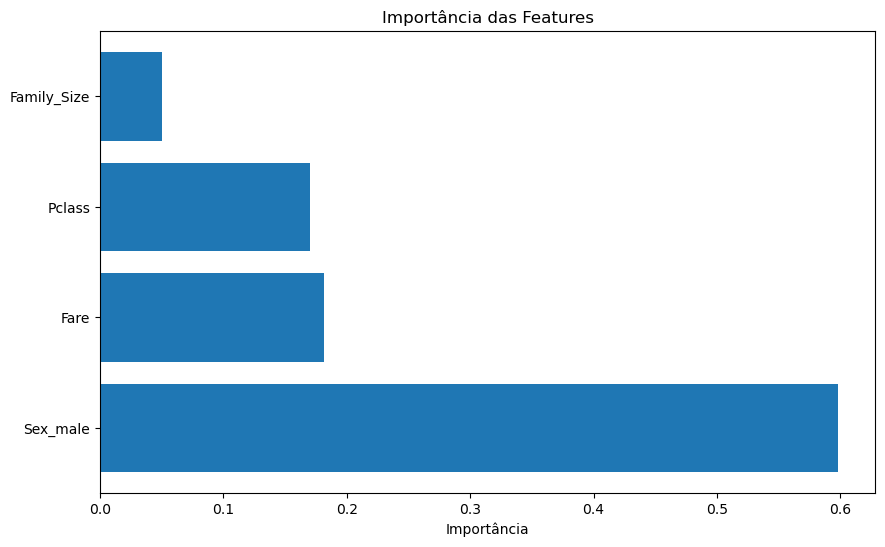

In [13]:
import matplotlib.pyplot as plt

# Obter a importância das features
importances = modelo.feature_importances_

# Criar um DataFrame para mostrar as features e suas importâncias
feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': importances
})

# Ordenar as features pela importância
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Visualizar as 10 features mais importantes
print(feature_importance_df.head(10))

# Plotando a importância das features
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importância')
plt.title('Importância das Features')
plt.show()

>Aqui eu vizualizei quais features tinham mais importância e fui monitorando quais delas trariam um melhor desempenho para as bases de treinamento e validação. 

### 🚀 **Implementação do Modelo**  

Com o modelo devidamente treinado e validado, partimos para a fase de implementação. Nesta etapa, utilizamos o conjunto de teste para realizar previsões sobre a sobrevivência dos passageiros do Titanic. As previsões são armazenadas em um **arquivo CSV** formatado de acordo com os padrões do Kaggle, permitindo a submissão na plataforma.  

A implementação garante que o pipeline esteja funcionando corretamente, aplicando o modelo treinado aos dados de teste e gerando uma saída pronta para avaliação. Assim, conseguimos medir o desempenho do nosso modelo em dados nunca antes vistos e compará-lo com outras soluções.

In [14]:
# Fazendo previsões no conjunto de teste
X_test = pd.get_dummies(teste[features], drop_first=True)
y_test_pred = modelo.predict(X_test)

# Adicionando as previsões ao dataframe de teste
teste['Survived'] = y_test_pred

# Visualizando as primeiras previsões
predicao = teste[['PassengerId', 'Survived']]

predicao.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [15]:
# Criando o arquivo de submissão
submission = pd.DataFrame({'PassengerId': predicao['PassengerId'], 'Survived': y_test_pred})
submission.to_csv('submission.csv', index=False)

print("✅ Arquivo 'submission.csv' gerado com sucesso!")

✅ Arquivo 'submission.csv' gerado com sucesso!
